<a href="https://colab.research.google.com/github/toweliewang/DL/blob/master/D1_mlp_sklearn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MLP using Sklearn

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import numpy

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/My Drive/Colab Notebooks/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
y = dataset[:,8]


In [0]:
# train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [0]:
#Normalization

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [34]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(100,100), max_iter=1000, verbose=2, alpha=0.0001)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.62438210
Iteration 2, loss = 0.58396911
Iteration 3, loss = 0.55021171
Iteration 4, loss = 0.52403693
Iteration 5, loss = 0.50505576
Iteration 6, loss = 0.49079966
Iteration 7, loss = 0.47959076
Iteration 8, loss = 0.47074845
Iteration 9, loss = 0.46361235
Iteration 10, loss = 0.45864917
Iteration 11, loss = 0.45459023
Iteration 12, loss = 0.45079736
Iteration 13, loss = 0.44839133
Iteration 14, loss = 0.44542577
Iteration 15, loss = 0.44330923
Iteration 16, loss = 0.44066631
Iteration 17, loss = 0.43778794
Iteration 18, loss = 0.43555013
Iteration 19, loss = 0.43316274
Iteration 20, loss = 0.43108587
Iteration 21, loss = 0.42881000
Iteration 22, loss = 0.42645134
Iteration 23, loss = 0.42425504
Iteration 24, loss = 0.42281559
Iteration 25, loss = 0.42057169
Iteration 26, loss = 0.41849185
Iteration 27, loss = 0.41644638
Iteration 28, loss = 0.41526020
Iteration 29, loss = 0.41287162
Iteration 30, loss = 0.41108654
Iteration 31, loss = 0.40931006
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [46]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.7109375
[[130  37]
 [ 37  52]]
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       167
         1.0       0.58      0.58      0.58        89

    accuracy                           0.71       256
   macro avg       0.68      0.68      0.68       256
weighted avg       0.71      0.71      0.71       256



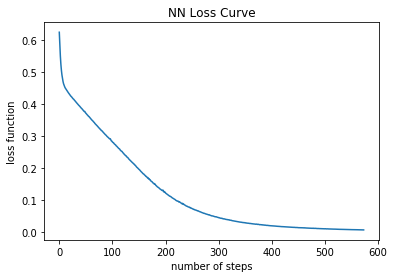

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [48]:
mlp.intercepts_[0]

array([ 0.34384151,  0.03693133, -0.25187676, -0.26758431,  0.13909581,
       -0.17946982,  0.14628888,  0.1584595 , -0.26137712, -0.30554372,
        0.19531954, -0.01114466,  0.23319617,  0.15211135,  0.1860946 ,
        0.03285479, -0.28274049,  0.37708604,  0.29665404, -0.35968132,
        0.15593981, -0.33798076,  0.40460082, -0.48540775,  0.29835551,
        0.15483374, -0.28541485, -0.01909539, -0.21776511,  0.21626372,
        0.16454385,  0.25849733, -0.33510989,  0.26256161,  0.16506468,
       -0.04323865,  0.13987774, -0.06510022,  0.1846565 , -0.06390201,
        0.23440167,  0.14723626,  0.06439435,  0.0928112 ,  0.02198631,
        0.15428643,  0.26541691,  0.08183853, -0.17022282,  0.38836076,
        0.28470954,  0.27776393, -0.09824958, -0.16768242,  0.15481001,
       -0.30896083,  0.09218976,  0.36105948,  0.07624465, -0.19845997,
       -0.1749424 , -0.01310343, -0.13199335,  0.21672382,  0.14852017,
       -0.16468655,  0.31700829, -0.13587753,  0.38321446,  0.17

In [49]:
mlp.coefs_[0]

array([[-0.22952419, -0.41244921, -0.4804041 , -0.18170077,  0.29127158,
         0.30254613,  0.01477998, -0.00856051,  0.10480578, -0.17460896,
        -0.47204491, -0.27481291,  0.34389917,  0.16498283,  0.13435557,
        -0.26597651,  0.15259088, -0.54076669, -0.65580805,  0.46520367,
         0.21335778, -0.54584659, -0.05776707,  0.36731537,  0.31814103,
        -0.12331796, -0.01554838, -0.30163294,  0.24682823, -0.34425603,
        -0.30209691, -0.15412947,  0.19607885,  0.21598939, -0.41080655,
        -0.26819604, -0.36322662, -0.22129134, -0.08415573,  0.04161634,
        -0.37205434, -0.49596647, -0.24888753,  0.0974192 ,  0.21453301,
        -0.34805073, -0.33930098,  0.04950496,  0.38705063, -0.36027719,
        -0.31471887, -0.40784171,  0.40562661, -0.3204264 ,  0.00790151,
         0.28209103, -0.07572487, -0.21870352,  0.34206914,  0.18176332,
        -0.08350565,  0.14612072,  0.10210232, -0.30658328,  0.40841592,
         0.15893348, -0.25102441,  0.40217183, -0.0

## MLP using keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense


# create keras model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

print(model.summary())

# Param = （input维度+1）* 神经元个数, 之所以要加1，是考虑到每个神经元都有一个Bias。
# https://blog.csdn.net/ybdesire/article/details/85217688

Using TensorFlow backend.
W0826 02:02:06.663804 140337625638784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 02:02:06.709478 140337625638784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 02:02:06.718166 140337625638784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


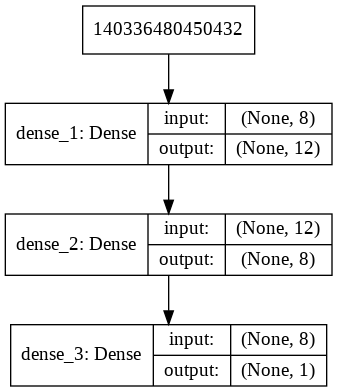

In [0]:
#conda install pydot pydotplus

from keras.utils import plot_model
import IPython
plot_model(model, to_file='model.png',show_shapes=True)
IPython.display.Image("model.png")

In [0]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model

history=model.fit(X_train, y_train, validation_split=0.25, epochs=80, batch_size=10)
# calculate predictions

W0826 02:02:43.587450 140337625638784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0826 02:02:43.628319 140337625638784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0826 02:02:43.635805 140337625638784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0826 02:02:43.859825 140337625638784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Train on 384 samples, validate on 128 samples
Epoch 1/80
384/384 [==============================] - 1s 2ms/step - loss: 0.6897 - acc: 0.6667 - val_loss: 0.6860 - val_acc: 0.6172
Epoch 2/80
384/384 [==============================] - 0s 154us/step - loss: 0.6727 - acc: 0.6615 - val_loss: 0.6592 - val_acc: 0.6172
Epoch 3/80
384/384 [==============================] - 0s 144us/step - loss: 0.6224 - acc: 0.6615 - val_loss: 0.6052 - val_acc: 0.6172
Epoch 4/80
384/384 [==============================] - 0s 155us/step - loss: 0.5573 - acc: 0.6615 - val_loss: 0.5622 - val_acc: 0.6172
Epoch 5/80
384/384 [==============================] - 0s 163us/step - loss: 0.5173 - acc: 0.6979 - val_loss: 0.5469 - val_acc: 0.7266
Epoch 6/80
384/384 [==============================] - 0s 129us/step - loss: 0.5016 - acc: 0.7917 - val_loss: 0.5366 - val_acc: 0.7578
Epoch 7/80
384/384 [==============================] - 0s 198us/step - loss: 0.4921 - acc: 0.8021 - val_loss: 0.5287 - val_acc: 0.7500
Epoch 8/80
384/384

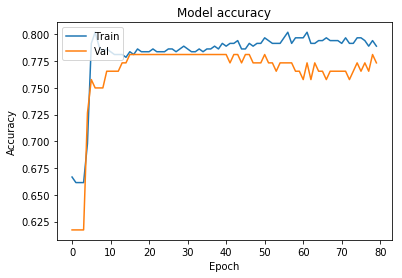

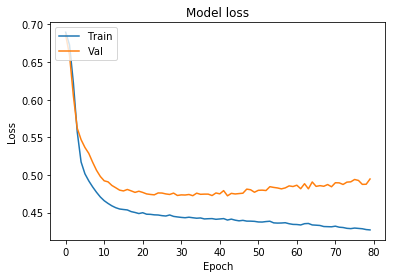

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-0.1182697 ,  0.14030077, -0.21907943,  0.10239354,  0.22357094,
         0.1699076 , -0.08547713,  0.0197637 ,  0.04790166,  0.06626222,
         0.11200212,  0.40232432],
       [-0.19413039,  0.37913436, -0.1135023 ,  0.36594334,  0.3843705 ,
         0.3511584 , -0.29489002, -0.24412332, -0.27900305, -0.2563574 ,
         0.34791088,  0.4062275 ],
       [ 0.13791566, -0.0974689 ,  0.15323591, -0.11809636,  0.02015866,
        -0.11267865,  0.11243205,  0.12374787,  0.08207493, -0.12051955,
        -0.11745966, -0.04675366],
       [-0.01572825, -0.03054496,  0.13478926, -0.00928626,  0.11181109,
        -0.02713425,  0.09208747, -0.30717996, -0.3292184 , -0.08386039,
        -0.01443778,  0.25080603],
       [-0.04799003, -0.0751109 , -0.22820298, -0.09323994,  0.0632924 ,
        -0.02047219,  0.08610842,  0.1313665 ,  0.22991483, -0.0712563 ,
        -0.09326907,  0.01927881],
       [-0.08847071,  0.1979917 , -0.07588264,  0.21220773,  0.21878701,
         0.20833814, 

In [0]:
predictions = model.predict(X_test)  
p_labels = [round(x[0]) for x in predictions]
# round(x[0])?

In [0]:
p_labels

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0

In [0]:
print("Accuracy", metrics.accuracy_score(y_test, p_labels))
print(confusion_matrix(y_test,p_labels))  
print(classification_report(y_test,p_labels))  

Accuracy 0.74609375
[[143  24]
 [ 41  48]]
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.81       167
         1.0       0.67      0.54      0.60        89

    accuracy                           0.75       256
   macro avg       0.72      0.70      0.71       256
weighted avg       0.74      0.75      0.74       256

